Script to generate Fig 8:
- (a-d) Depth profiles of s1 (contours) and absolute salinity (shading) along the four cross-slope transects
considered in Fig. 7. Time-mean values for the final year of the control simulation are shown. (e-l) Salinity
anomalies (shading) averaged over the final year of the MW45 (e-h) and MW85 (i-l) simulations, relative to the
control simulation. Contours show time-mean (absolute) s1 values for the final year of the experiments.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as col
import matplotlib.ticker as mticker
import cmocean.cm as cmo
import matplotlib.path as mpath
### establish link to python functions
import sys
sys.path.append('/home/156/rm2389/Honours_Thesis/python_functions/')
### import required python functions
from masking import shelf_mask_isobath, fill_land
from spatial_averaging import month_weights
import cosima_cookbook as cc
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.axes_grid1.colorbar import colorbar
from dask.distributed import Client
client = Client('tcp://localhost:8786')
client

Client Scheduler: tcp://localhost:8786 Dashboard: http://localhost:8787/status,Cluster Workers: 6 Cores: 6 Memory: 18.00 GB


In [2]:
db = '/g/data/v45/rm2389/databases/freshwater_experiments.db' # database path
session = cc.database.create_session(db)
control='01deg_jra55v13_ryf8485_spinup6'
rcp45='01deg_jra55v13_ryf8485_freshRCP45'
rcp85='01deg_jra55v13_ryf8485_freshRCP85'

In [3]:
from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('xtick', labelsize=25) 
rc('ytick', labelsize=25) 
rc('axes', labelsize=25) 
rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [8]:
## already converted values on these transects to conservative quantities
save_dir = '/g/data/v45/rm2389/Speed_Transport/'
adelie_control_sigma1  = xr.open_dataset(save_dir+'control_sigma1_adelie_transect.nc')
adelie_control_sigma1 = adelie_control_sigma1.sigma1
adelie_control_salt  = xr.open_dataset(save_dir+'control_AS_adelie_transect.nc')
adelie_control_salt = adelie_control_salt.salt
adelie_rcp45_sigma1  = xr.open_dataset(save_dir+'rcp45_sigma1_adelie_transect.nc')
adelie_rcp45_sigma1 = adelie_rcp45_sigma1.sigma1
adelie_rcp45_salt  = xr.open_dataset(save_dir+'rcp45_AS_adelie_transect.nc')
adelie_rcp45_salt = adelie_rcp45_salt.salt
adelie_rcp85_sigma1  = xr.open_dataset(save_dir+'rcp85_sigma1_adelie_transect.nc')
adelie_rcp85_sigma1 = adelie_rcp85_sigma1.sigma1
adelie_rcp85_salt  = xr.open_dataset(save_dir+'rcp85_AS_adelie_transect.nc')
adelie_rcp85_salt = adelie_rcp85_salt.salt

wap_control_sigma1  = xr.open_dataset(save_dir+'control_sigma1_wap_transect.nc')
wap_control_sigma1 = wap_control_sigma1.sigma1
wap_control_salt  = xr.open_dataset(save_dir+'control_AS_wap_transect.nc')
wap_control_salt = wap_control_salt.salt
wap_rcp45_sigma1  = xr.open_dataset(save_dir+'rcp45_sigma1_wap_transect.nc')
wap_rcp45_sigma1 = wap_rcp45_sigma1.sigma1
wap_rcp45_salt  = xr.open_dataset(save_dir+'rcp45_AS_wap_transect.nc')
wap_rcp45_salt = wap_rcp45_salt.salt
wap_rcp85_sigma1  = xr.open_dataset(save_dir+'rcp85_sigma1_wap_transect.nc')
wap_rcp85_sigma1 = wap_rcp85_sigma1.sigma1
wap_rcp85_salt  = xr.open_dataset(save_dir+'rcp85_AS_wap_transect.nc')
wap_rcp85_salt = wap_rcp85_salt.salt

marie_control_sigma1  = xr.open_dataset(save_dir+'control_sigma1_marie_transect.nc')
marie_control_sigma1 = marie_control_sigma1.sigma1
marie_control_salt  = xr.open_dataset(save_dir+'control_AS_marie_transect.nc')
marie_control_salt = marie_control_salt.salt
marie_rcp45_sigma1  = xr.open_dataset(save_dir+'rcp45_sigma1_marie_transect.nc')
marie_rcp45_sigma1 = marie_rcp45_sigma1.sigma1
marie_rcp45_salt  = xr.open_dataset(save_dir+'rcp45_AS_marie_transect.nc')
marie_rcp45_salt = marie_rcp45_salt.salt
marie_rcp85_sigma1  = xr.open_dataset(save_dir+'rcp85_sigma1_marie_transect.nc')
marie_rcp85_sigma1 = marie_rcp85_sigma1.sigma1
marie_rcp85_salt  = xr.open_dataset(save_dir+'rcp85_AS_marie_transect.nc')
marie_rcp85_salt = marie_rcp85_salt.salt

east_control_sigma1  = xr.open_dataset(save_dir+'control_sigma1_east_transect.nc')
east_control_sigma1 = east_control_sigma1.sigma1
east_control_salt  = xr.open_dataset(save_dir+'control_AS_east_transect.nc')
east_control_salt = east_control_salt.salt
east_rcp45_sigma1  = xr.open_dataset(save_dir+'rcp45_sigma1_east_transect.nc')
east_rcp45_sigma1 = east_rcp45_sigma1.sigma1
east_rcp45_salt  = xr.open_dataset(save_dir+'rcp45_AS_east_transect.nc')
east_rcp45_salt = east_rcp45_salt.salt
east_rcp85_sigma1  = xr.open_dataset(save_dir+'rcp85_sigma1_east_transect.nc')
east_rcp85_sigma1 = east_rcp85_sigma1.sigma1
east_rcp85_salt  = xr.open_dataset(save_dir+'rcp85_AS_east_transect.nc')
east_rcp85_salt = east_rcp85_salt.salt

In [9]:
adelie_rcp45_salt_anomaly = adelie_rcp45_salt - adelie_control_salt
adelie_rcp85_salt_anomaly = adelie_rcp85_salt - adelie_control_salt
marie_rcp45_salt_anomaly = marie_rcp45_salt - marie_control_salt
marie_rcp85_salt_anomaly = marie_rcp85_salt - marie_control_salt
wap_rcp85_salt_anomaly = wap_rcp85_salt - wap_control_salt
wap_rcp45_salt_anomaly = wap_rcp45_salt - wap_control_salt
east_rcp45_salt_anomaly = east_rcp45_salt - east_control_salt
east_rcp85_salt_anomaly = east_rcp85_salt - east_control_salt

In [41]:
def control_salinity_sigma1(ax0,ax1,ax2,ax3,colors):
    levels = np.arange(33.7,34.9,0.01)
    norm = col.Normalize(vmin=33.7,vmax=34.9) 
    salt = ax1.contourf(adelie_control_salt.yt_ocean,adelie_control_salt.st_ocean,adelie_control_salt.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax2.contourf(marie_control_salt.yt_ocean,marie_control_salt.st_ocean,marie_control_salt.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax0.contourf(east_control_salt.yt_ocean,east_control_salt.st_ocean,east_control_salt.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax3.contourf(wap_control_salt.yt_ocean,wap_control_salt.st_ocean,wap_control_salt.values,levels=levels,cmap=colors,norm=norm ,extend='both')

    levels = np.array([32.35,32.50,32.53,32.55,32.60,32.65])    
    ax1.contour(adelie_control_sigma1.yt_ocean, adelie_control_sigma1.st_ocean, adelie_control_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([31.90, 32.10,32.30,32.35,32.40,32.45])
    ax2.contour(marie_control_sigma1.yt_ocean, marie_control_sigma1.st_ocean, marie_control_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([32.30,32.45,32.50,32.53,32.54])
    ax0.contour(east_control_sigma1.yt_ocean, east_control_sigma1.st_ocean, east_control_sigma1.values, levels=levels, colors = 'k', linewidths = 1)
    levels = np.array([32.00,32.20,32.30,32.40,32.45])
    ax3.contour(wap_control_sigma1.yt_ocean, wap_control_sigma1.st_ocean, wap_control_sigma1.values, levels=levels, colors = 'k', linewidths = 1)
    
    ax0.set_ylim([1000,0])
    ax1.set_ylim([1000,0])
    ax2.set_ylim([1000,0])   
    ax3.set_ylim([1000,0]) 
    ax3.set_xlim([-64.6,-62])   
    ax0.set_ylabel('Depth (m)', fontsize = 36)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)


    return salt

In [43]:
def rcp45_salinity_sigma1_anomaly(ax0,ax1,ax2,ax3,colors):
    levels = np.arange(-2,2,0.01)
    norm = col.Normalize(vmin=-2,vmax=2) 
    salt = ax1.contourf(adelie_rcp45_salt.yt_ocean,adelie_rcp45_salt.st_ocean,adelie_rcp45_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax2.contourf(marie_rcp45_salt.yt_ocean,marie_rcp45_salt.st_ocean,marie_rcp45_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax0.contourf(east_rcp45_salt.yt_ocean,east_rcp45_salt.st_ocean,east_rcp45_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax3.contourf(wap_rcp45_salt.yt_ocean,wap_rcp45_salt.st_ocean,wap_rcp45_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')

    levels = np.array([32.00,32.40,32.45,32.47,32.50])
    ax1.contour(adelie_rcp45_sigma1.yt_ocean, adelie_rcp45_sigma1.st_ocean, adelie_rcp45_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([31.00,32.00,32.35,32.40,32.45])
    ax2.contour(marie_rcp45_sigma1.yt_ocean, marie_rcp45_sigma1.st_ocean, marie_rcp45_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([32.20,32.30,32.40,32.45,32.50])
    ax0.contour(east_rcp45_sigma1.yt_ocean, east_rcp45_sigma1.st_ocean, east_rcp45_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([32,32.20,32.3,32.40,32.45])
    ax3.contour(wap_rcp45_sigma1.yt_ocean, wap_rcp45_sigma1.st_ocean, wap_rcp45_sigma1.values, levels=levels, colors = 'k', linewidths=1)

    ax0.set_ylim([1000,0])
    ax1.set_ylim([1000,0])
    ax2.set_ylim([1000,0])   
    ax3.set_ylim([1000,0])   
    ax3.set_xlim([-64.6,-62])   
    ax0.set_ylabel('Depth (m)', fontsize = 36)
    
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    
    return salt

In [47]:
def rcp85_salinity_sigma1_anomaly(ax0,ax1,ax2,ax3,colors):
    levels = np.arange(-2,2,0.01)
    norm = col.Normalize(vmin=-2,vmax=2) 
    salt = ax1.contourf(adelie_rcp85_salt.yt_ocean,adelie_rcp85_salt.st_ocean,adelie_rcp85_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax2.contourf(marie_rcp85_salt.yt_ocean,marie_rcp85_salt.st_ocean,marie_rcp85_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax0.contourf(east_rcp85_salt.yt_ocean,east_rcp85_salt.st_ocean,east_rcp85_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')
    ax3.contourf(wap_rcp85_salt.yt_ocean,wap_rcp85_salt.st_ocean,wap_rcp85_salt_anomaly.values,levels=levels,cmap=colors,norm=norm ,extend='both')

    levels = np.array([32,32.2,32.4,32.45,32.5])
    ax1.contour(adelie_rcp85_sigma1.yt_ocean, adelie_rcp85_sigma1.st_ocean, adelie_rcp85_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([31,32,32.35,32.4,32.45])
    ax2.contour(marie_rcp85_sigma1.yt_ocean, marie_rcp85_sigma1.st_ocean, marie_rcp85_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([32,32.2,32.3,32.4,32.45,32.5])
    ax0.contour(east_rcp85_sigma1.yt_ocean, east_rcp85_sigma1.st_ocean, east_rcp85_sigma1.values, levels=levels, colors = 'k', linewidths=1)
    levels = np.array([31.8,32,32.1,32.2,32.3,32.4])
    ax3.contour(wap_rcp85_sigma1.yt_ocean, wap_rcp85_sigma1.st_ocean, wap_rcp85_sigma1.values, levels=levels, colors = 'k', linewidths=1)

    ax0.set_ylim([1000,0])
    ax1.set_ylim([1000,0])
    ax2.set_ylim([1000,0])   
    ax3.set_ylim([1000,0])  
    ax3.set_xlim([-64.6,-62])   
    ax0.set_ylabel('Depth (m)', fontsize = 36)
    ax0.set_xlabel('Latitude', fontsize = 36)
    ax1.set_xlabel('Latitude', fontsize = 36)
    ax2.set_xlabel('Latitude', fontsize = 36)
    ax3.set_xlabel('Latitude', fontsize = 36)
    
    plt.setp(ax1.get_yticklabels(), visible=False)
    plt.setp(ax2.get_yticklabels(), visible=False)
    plt.setp(ax3.get_yticklabels(), visible=False)
    
    return salt

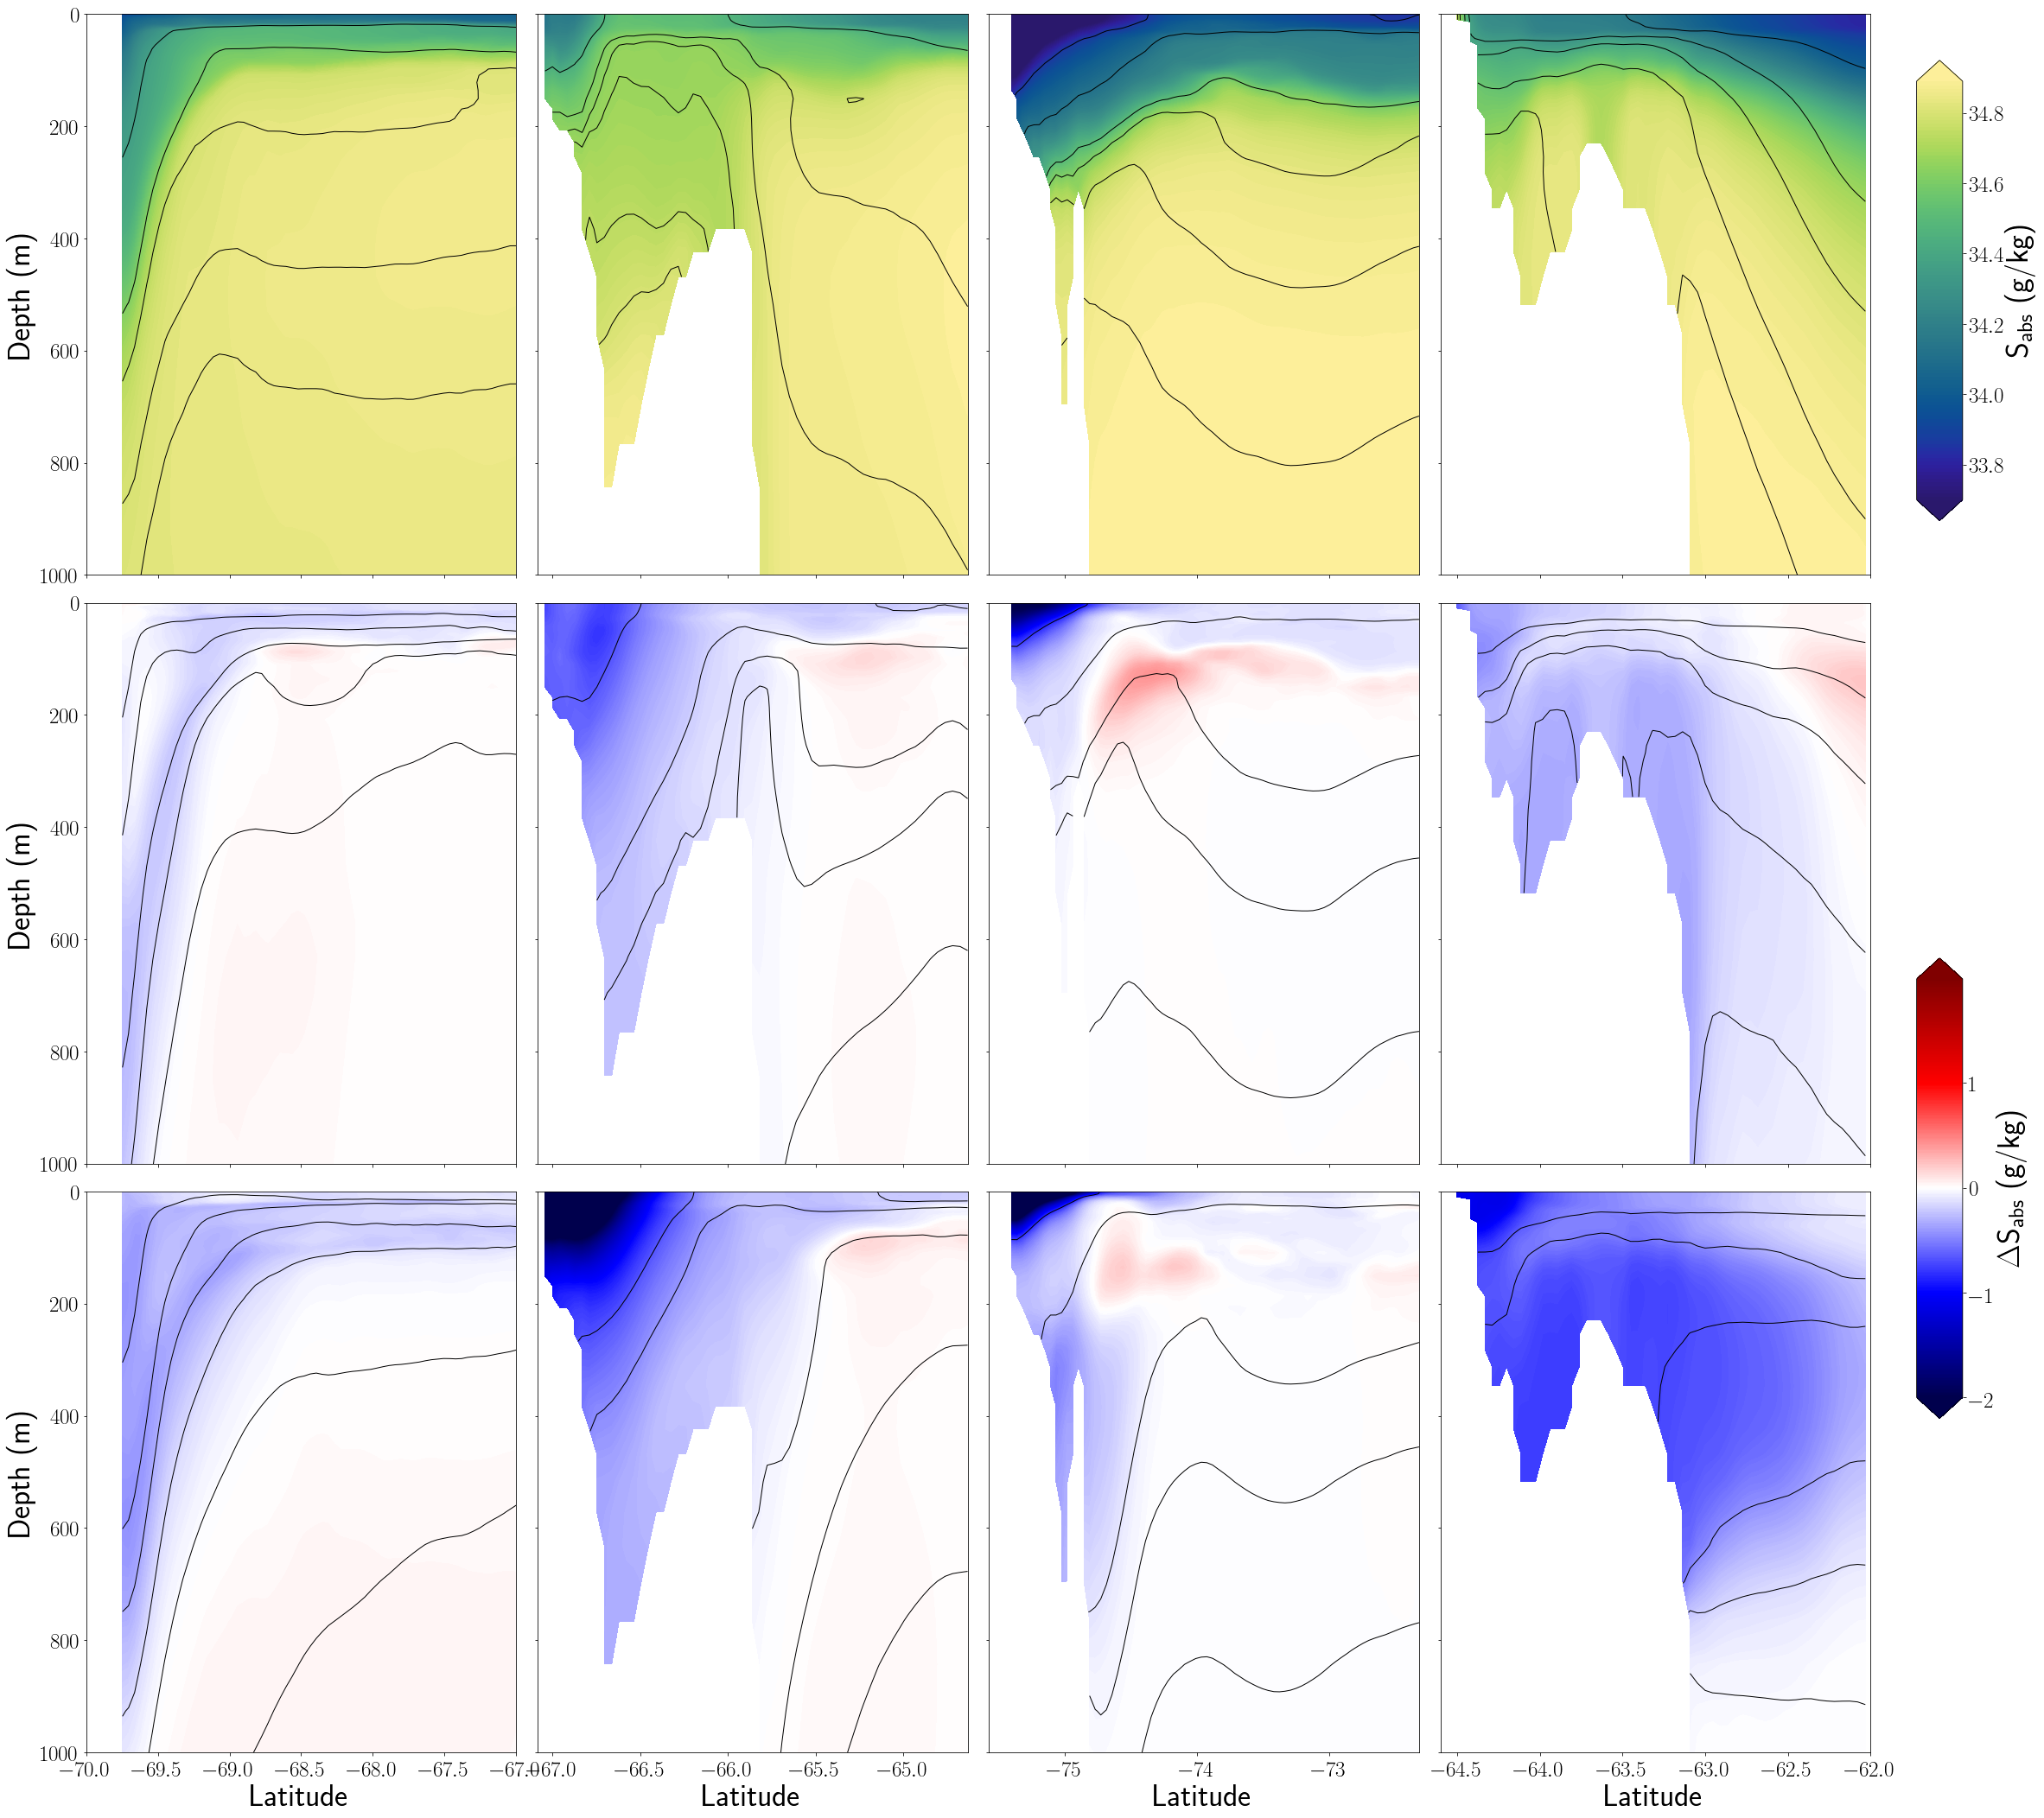

In [49]:
fig  = plt.figure(1, figsize = (37,37))
gs = gridspec.GridSpec(3,4)
gs.update(hspace = 0.05, wspace = 0.05)
ax0,ax1, ax2, ax3 = plt.subplot(gs[0,0]), plt.subplot(gs[0,1]), plt.subplot(gs[0,2]), plt.subplot(gs[0,3])
ax4, ax5, ax6, ax7 = plt.subplot(gs[1,0]), plt.subplot(gs[1,1]), plt.subplot(gs[1,2]), plt.subplot(gs[1,3])
ax8, ax9, ax10, ax11 = plt.subplot(gs[2,0]), plt.subplot(gs[2,1]), plt.subplot(gs[2,2]), plt.subplot(gs[2,3])

salt_control = control_salinity_sigma1(ax0,ax1,ax2,ax3,cmo.haline)
salt_anomaly = rcp45_salinity_sigma1_anomaly(ax4, ax5, ax6, ax7,'seismic')
rcp85_salinity_sigma1_anomaly(ax8, ax9, ax10, ax11,'seismic')

cax = plt.axes([0.92, 0.27, 0.02, 0.2])
cbar=plt.colorbar(salt_anomaly, cax = cax,orientation='vertical', shrink = 0.5, ticks = [-2,-1,0,1,2])
cbar.set_label(r'$\Delta$S$_\text{abs}$ (g/kg)', fontsize = 36)

cax = plt.axes([0.92, 0.66, 0.02, 0.2])
cbar=plt.colorbar(salt_control, cax = cax,orientation='vertical', shrink = 0.5, ticks = [33.6,33.8,34,34.2,34.4,34.6,34.8])
cbar.set_label(r'S$_\text{abs}$ (g/kg)', fontsize = 36)

figurepath = 'Fig8.png'
fig.savefig(figurepath, dpi=None, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format='png',
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None)
plt.show()